## 💻 UnpackAI DL201 Bootcamp - Week 3 - tabular pipelines

### 📕 Learning Objectives

* Getting working examples able to achieve the main tabular tasks

### 📖 Concepts map

* Regression
* Prediction

In [1]:
# Standard Library Imports, we use it to define the directories below
from pathlib import Path

In [2]:
is_kaggle = False   # True if you are on Kaggle, False for local Windows, Linux or Mac environments.

if is_kaggle:
    !git clone -b Cohort_7 https://github.com/unpackAI/DL201.git
    !pip install pycaret[full] --user -qq
    IMAGE_DIR = Path('/kaggle/working/DL201/img')
    DATA_DIR = Path('/kaggle/working/DL201/data')
else:
    # This section is for local execution, it is assumed that the notebook is on the 'Week-2' folder
    # of the DL201 repository.
    DATA_DIR = Path('../data')
    IMAGE_DIR = Path('../img')

In [3]:
# Installed packages (we installed them in the cell above)
import pandas as pd
import pycaret.classification as py_classification
import pycaret.regression as py_regression
#from ipywidgets import widgets

# Our package
#from pandas_profiling import ProfileReport
#from pandas_profiling.utils.cache import cache_file

#import numpy as np
#from matplotlib import pyplot as plt
#import re 
import os

In [4]:
# finally, check if we found the right pathes
if os.path.isdir(DATA_DIR):
    print(f'DATA_DIR is a directory, its path is {DATA_DIR}')
else:
    print("ERROR : DATA_DIR is not a directory")

if os.path.isdir(IMAGE_DIR):
    print(f'IMAGE_DIR is a directory, its path is {IMAGE_DIR}')
else:
    print("ERROR : IMAGE_DIR is not a directory")

DATA_DIR is a directory, its path is ..\data
IMAGE_DIR is a directory, its path is ..\img


In [5]:
# And create a directory for output data
OUTPUT_DIR = os.path.join(DATA_DIR, 'Output')
if not os.path.isdir(OUTPUT_DIR):
    os.mkdir(OUTPUT_DIR)
if not os.path.isdir(OUTPUT_DIR):
    print("ERROR, we did not success in creating an output directory")
else:
    print("OUTPUT_DIR is ready !")

OUTPUT_DIR is ready !


# Part 1. Introduction

Giving working example able to inspire you to build your own AI project

* load the data
* clean the data
* perform a regression task
* perform a classification task

# Part 2. Data loading

In [48]:
data_path = os.path.join(DATA_DIR, 'house-prices', 'train.csv')

In [7]:
print(os.path.isfile(data_path))

True


In [49]:
houses_df = pd.read_csv(data_path,index_col=0)

In [9]:
houses_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Part 3. Data Preparation

Example of data preparation :
- remove the features which are too correlated to our target, or those you do not wish to work with.
- data cleaning

In [50]:
houses_df.drop(['YearRemodAdd','GarageYrBlt','ExterQual','Foundation',
             'Exterior1st','BsmtQual','OverallCond','HeatingQC','EnclosedPorch',
             'KitchenQual','Exterior2nd','GarageFinish','BsmtFinType1'],inplace=True,axis=1)

# Part 4. Regression (using Auto Machine Learning)


If the dataset is very large, we may want to take a sample of the dataset so that the training speed is much faster. This is especially true for Auto Machine Learning where we run dozens of models

In [11]:
sample_size = 100
data_sample = houses_df.sample(sample_size, random_state = 1)

In [12]:
#data_sample

## 4.2 Prepare the data for pycaret

In [13]:
data_prep = py_regression.setup(data_sample, target = 'YearBuilt', session_id=123, feature_selection = True, remove_multicollinearity = True, silent = True)

,Description,Value
0,session_id,123
1,Target,YearBuilt
2,Original Data,"(100, 67)"
3,Missing Values,True
4,Numeric Features,13
5,Categorical Features,53
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(69, 186)"


## 4.3 Training different models and choose the best one

In [14]:
best_model = py_regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,13.3735,445.3361,18.8199,0.5899,0.0096,0.0068,0.0080
rf,Random Forest Regressor,14.6745,465.5644,19.6246,0.5638,0.0100,0.0075,0.0240
et,Extra Trees Regressor,14.5356,555.6570,20.5154,0.5033,0.0105,0.0075,0.0220
ada,AdaBoost Regressor,15.3163,509.5813,20.6297,0.4913,0.0105,0.0078,0.0090
lasso,Lasso Regression,16.2812,488.5094,21.1633,0.4525,0.0108,0.0083,0.1570
lightgbm,Light Gradient Boosting Machine,18.6765,581.0721,22.7968,0.3890,0.0117,0.0096,0.0110
dt,Decision Tree Regressor,15.2476,615.3381,22.0655,0.3831,0.0113,0.0078,0.0040
knn,K Neighbors Regressor,19.0348,626.5900,23.3076,0.3748,0.0119,0.0097,0.0030
en,Elastic Net,17.7565,539.1328,22.3258,0.3670,0.0114,0.0091,0.0050
llar,Lasso Least Angle Regression,19.8957,697.2100,24.4330,0.3359,0.0125,0.0102,0.5840


We choose the Gradient Boosting Regressor as the best model

## 4.4 Train the best model on the entire data

In [15]:
data_prep = py_regression.setup(houses_df, target = 'YearBuilt', session_id=123, feature_selection = True, remove_multicollinearity = True, silent = True)

,Description,Value
0,session_id,123
1,Target,YearBuilt
2,Original Data,"(1460, 67)"
3,Missing Values,True
4,Numeric Features,15
5,Categorical Features,51
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 300)"


In [16]:
model = py_regression.create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.9574,106.5193,10.3208,0.9018,0.0053,0.0036
1,7.8163,102.9848,10.1481,0.9009,0.0052,0.0040
2,7.4220,122.7211,11.0780,0.8621,0.0057,0.0038
3,8.3856,133.6216,11.5595,0.8671,0.0059,0.0043
4,8.7499,206.6314,14.3747,0.7944,0.0073,0.0045
5,7.6604,115.9609,10.7685,0.8483,0.0055,0.0039
6,7.9232,118.5501,10.8881,0.8716,0.0056,0.0040
7,6.9519,123.4792,11.1121,0.8663,0.0057,0.0036
8,8.4776,144.6815,12.0284,0.8317,0.0061,0.0043


In [17]:
tuned_model = py_regression.tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.9181,122.8165,11.0823,0.8868,0.0057,0.0036
1,6.7553,93.8517,9.6877,0.9097,0.0050,0.0035
2,6.9957,118.5562,10.8884,0.8667,0.0056,0.0036
3,8.5644,157.9578,12.5681,0.8429,0.0065,0.0044
4,7.3589,165.8078,12.8766,0.8350,0.0066,0.0037
5,7.4179,120.7779,10.9899,0.8420,0.0056,0.0038
6,7.2668,119.3638,10.9254,0.8707,0.0056,0.0037
7,7.1038,140.2947,11.8446,0.8481,0.0061,0.0036
8,7.5446,130.7544,11.4348,0.8479,0.0059,0.0039


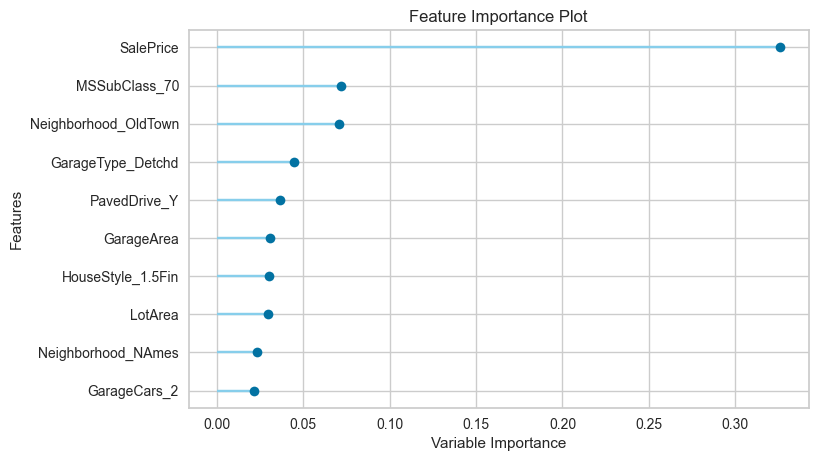

In [18]:
py_regression.plot_model(tuned_model,plot='feature')

## 4.5 Next steps
* if the result is not good enough
    - perform more steps of data cleansing
    - try to drop out non significant features
* if the result is too good
    - try to drop out too much correlated features to get more insights from the data

## 4.6 Save the model for future use

In [19]:
final_model = py_regression.finalize_model(tuned_model)

In [20]:
model_name = "gbr_entiredataset_withsaleprice"
model_path = os.path.join(OUTPUT_DIR, model_name)

In [21]:
py_regression.save_model(final_model, model_path)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='YearBuilt',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                            learning_rate=0.15, loss='ls',
                                            max_depth=7, max_features=1.0,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.02,
                          

In [22]:
# the model file will end by pkl
model_file_name = model_path + ".pkl"
print(os.path.isfile(model_file_name))

True


In [23]:
final_model = py_regression.load_model(model_path)

Transformation Pipeline and Model Successfully Loaded


# Part 5. Classification (using Auto Machine Learning)

Here, we will create a new feature, ***NewHouse***, which is categorical. Sometimes, your target feature may be an existing feature.

In [51]:
houses_df['NewHouse'] = houses_df['YearBuilt'] > 1999

Of course, we have to remove the feature ***YearBuilt***, which is, by construction, correlated to our target feature.

In [62]:
houses_df.drop(['YearBuilt'],inplace=True,axis=1)

## 5.1 Taking a sample of the data
If the dataset is very large, we may want to take a sample of the dataset so that the training speed is much faster. This is especially true for Auto Machine Learning where we run dozens of models

In [63]:
sample_size = 100
data_sample = houses_df.sample(sample_size, random_state = 2)

Check that we have all the different labels in our sample data

In [64]:
data_sample['NewHouse'].value_counts()

False    69
True     31
Name: NewHouse, dtype: int64

## 4.2 Prepare the data for pycaret

In [65]:
data_prep = py_classification.setup(data_sample, target = 'NewHouse', fix_imbalance=True, session_id=123, feature_selection = True, remove_multicollinearity = True, silent = True)

,Description,Value
0,session_id,123
1,Target,NewHouse
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(100, 67)"
5,Missing Values,True
6,Numeric Features,13
7,Categorical Features,53
8,Ordinal Features,False
9,High Cardinality Features,False


## 4.3 Training different models and choose the best one

In [66]:
best_model = py_classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8857,0.0000,0.9000,0.8000,0.8200,0.7421,0.7660,0.0030
rf,Random Forest Classifier,0.8405,0.8400,0.5000,0.6500,0.5500,0.4829,0.4978,0.0260
et,Extra Trees Classifier,0.8405,0.8300,0.5000,0.7000,0.5667,0.4882,0.5066,0.0220
lightgbm,Light Gradient Boosting Machine,0.8405,0.9000,0.6500,0.7000,0.6333,0.5414,0.5730,0.0070
lr,Logistic Regression,0.8262,0.8550,0.8000,0.7000,0.7200,0.6004,0.6247,0.0190
dt,Decision Tree Classifier,0.7976,0.7300,0.6000,0.6500,0.5867,0.4609,0.4906,0.0040
gbc,Gradient Boosting Classifier,0.7690,0.8000,0.6000,0.5333,0.5400,0.3925,0.4130,0.0120
nb,Naive Bayes,0.7667,0.8500,0.8000,0.5500,0.6367,0.4782,0.5066,0.0030
ada,Ada Boost Classifier,0.7548,0.7800,0.5000,0.5167,0.4833,0.3433,0.3595,0.0110
qda,Quadratic Discriminant Analysis,0.7405,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0040


## 4.4 Train the best model on the entire data

In [68]:
data_prep = py_classification.setup(houses_df, target = 'NewHouse', session_id=123, feature_selection = True, remove_multicollinearity = True, silent = True)

,Description,Value
0,session_id,123
1,Target,NewHouse
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(1460, 67)"
5,Missing Values,True
6,Numeric Features,15
7,Categorical Features,51
8,Ordinal Features,False
9,High Cardinality Features,False


In [69]:
model = py_classification.create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9515,0.0000,0.9630,0.8667,0.9123,0.8789,0.8812
1,0.9510,0.0000,0.9231,0.8889,0.9057,0.8726,0.8728
2,0.9314,0.0000,0.8846,0.8519,0.8679,0.8216,0.8219
3,0.9706,0.0000,0.8846,1.0000,0.9388,0.9195,0.9225
4,0.9412,0.0000,0.8846,0.8846,0.8846,0.8451,0.8451
5,0.9216,0.0000,0.7692,0.9091,0.8333,0.7825,0.7872
6,0.9412,0.0000,0.8077,0.9545,0.8750,0.8369,0.8419
7,0.9608,0.0000,0.9615,0.8929,0.9259,0.8993,0.9005
8,0.9216,0.0000,0.8462,0.8462,0.8462,0.7935,0.7935


In [70]:
tuned_model = py_classification.tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9709,0.0000,1.0000,0.9000,0.9474,0.9273,0.9298
1,0.9510,0.0000,0.9231,0.8889,0.9057,0.8726,0.8728
2,0.9216,0.0000,0.8462,0.8462,0.8462,0.7935,0.7935
3,0.9608,0.0000,0.8462,1.0000,0.9167,0.8913,0.8966
4,0.9510,0.0000,0.8846,0.9200,0.9020,0.8693,0.8696
5,0.9314,0.0000,0.7692,0.9524,0.8511,0.8071,0.8149
6,0.9412,0.0000,0.8077,0.9545,0.8750,0.8369,0.8419
7,0.9608,0.0000,0.9615,0.8929,0.9259,0.8993,0.9005
8,0.9314,0.0000,0.8462,0.8800,0.8627,0.8170,0.8173


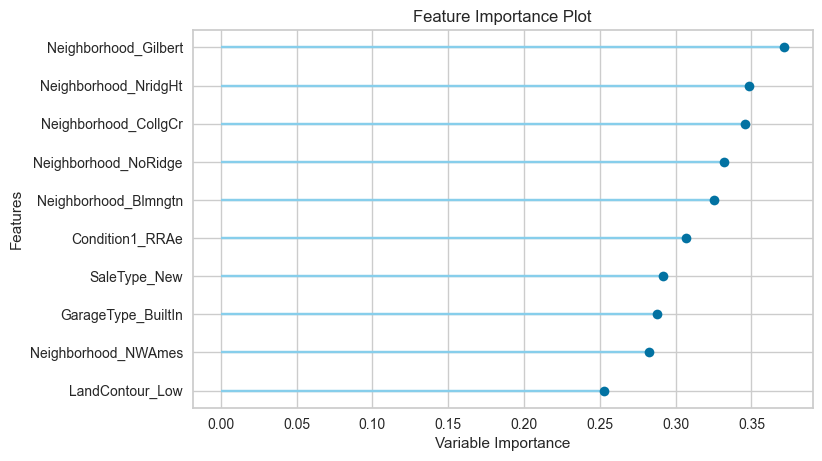

In [71]:
py_classification.plot_model(tuned_model,plot='feature')

## 4.5 Next steps
* if the result is not good enough
    - perform more steps of data cleansing
    - try to drop out non significant features
* if the result is too good
    - try to drop out too much correlated features to get more insights from the data

## 4.6 Save the model for future use

In [72]:
final_model = py_classification.finalize_model(tuned_model)

In [73]:
model_name = "ridge_entiredataset"

In [74]:
model_path = os.path.join(OUTPUT_DIR, model_name)

In [75]:
py_regression.save_model(final_model, model_path)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='NewHouse',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                  Fix_multicollinearity(correlation_with_target_preference=None,
                                        correlation_with_target_threshold=0.0,
                                        target_variable='NewHouse',
                                        thresh

In [76]:
# the model file will end by pkl
model_file_name = model_path + ".pkl"
print(os.path.isfile(model_file_name))

True


In [77]:
final_model = py_regression.load_model(model_path)

Transformation Pipeline and Model Successfully Loaded
